# Coding Temple's Data Analytics Program
---
## Python for DA: Weekend Project

For this weekend project, you will be connecting to the [Disney API](https://disneyapi.dev/) to create an ETL pipeline. Your project should contain:

- etl_pipeline.py
    - Loads in data from the API object for all characters
    - Stores required fields from the API to a DataFrame
        - name
        - all movies/shows the character appeared in
        - any allies
        - any enemies
        - any park attractions
    - Cleans the data
    - Performs any transformations/feature engineering you wish to complete
    - Stores the data in an ElephantSQL server
    - Stores the data in a .csv file

- notebook.ipynb
    - Contains all cells you used to test your code before loading it into the pipeline
    - Loads in the data from your .csv file
    - Conduct EDA through data
    - Conduct an analysis on your dataset!

In [2]:
#import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests, json
import numpy as np
from numpy import asarray
from PIL import Image
from io import BytesIO

In [3]:
#checking responses from the API
url = 'https://api.disneyapi.dev/character'
response = requests.get(url)
print(response)
response.ok
response.json()

<Response [200]>


{'info': {'count': 50,
  'totalPages': 149,
  'previousPage': None,
  'nextPage': 'http://api.disneyapi.dev/character?page=2&pageSize=50'},
 'data': [{'_id': 112,
   'films': ['Hercules (film)'],
   'shortFilms': [],
   'tvShows': ['Hercules (TV series)'],
   'videoGames': ['Kingdom Hearts III'],
   'parkAttractions': [],
   'allies': [],
   'enemies': [],
   'sourceUrl': 'https://disney.fandom.com/wiki/Achilles_(Hercules)',
   'name': 'Achilles',
   'imageUrl': 'https://static.wikia.nocookie.net/disney/images/d/d3/Vlcsnap-2015-05-06-23h04m15s601.png',
   'createdAt': '2021-04-12T01:31:30.547Z',
   'updatedAt': '2021-12-20T20:39:18.033Z',
   'url': 'https://api.disneyapi.dev/characters/112',
   '__v': 0},
  {'_id': 18,
   'films': ['The Fox and the Hound', 'The Fox and the Hound 2'],
   'shortFilms': [],
   'tvShows': [],
   'videoGames': [],
   'parkAttractions': [],
   'allies': [],
   'enemies': [],
   'sourceUrl': 'https://disney.fandom.com/wiki/Abigail_the_Cow',
   'name': 'Abigai

In [8]:


# Function for organizing the data into a new dictionary
infodict = response.json()['data']
def infofilter(infodict):

        name = [infodict[x]['name'] for x in range(len(infodict))] 
        films = [infodict[x]['films'] for x in range(len(infodict))]
        short_films = [infodict[x]['shortFilms'] for x in range(len(infodict))]
        tv_shows = [infodict[x]['tvShows'] for x in range(len(infodict))]
        allies = [infodict[x]['allies'] for x in range(len(infodict))]
        enemies = [infodict[x]['enemies'] for x in range(len(infodict))]
        park_attractions = [infodict[x]['parkAttractions'] for x in range(len(infodict))]

        character_data = {
                'name': name,
                'films': films,
                'short_films':short_films,
                'tv_shows':tv_shows,
                'allies':allies,
                'enemies':enemies,
                'park_attractions':park_attractions

        }
        
        return character_data

filtered_character_list = infofilter(infodict)
filtered_character_list


{'name': ['Achilles',
  'Abigail the Cow',
  'Abdullah',
  'Admiral Boom and Mr. Binnacle',
  '.GIFfany',
  "90's Adventure Bear",
  'Candace Adams',
  'Ahadi',
  'Al Muddy Sultan',
  'Irwina Allen',
  'Ambrose',
  'Amos',
  'Arabella',
  'Arabella Smith',
  'Queen Ariel',
  'Arthur and Cecil',
  'Fiona Ashbury',
  'Ashcan and Pete',
  'Aspen',
  'Astuto',
  'Athena',
  'Aunt Em',
  'Aviarius',
  'Prince Axel',
  'Butter Otter',
  'Baby Panda',
  'Marta Balatico',
  'Mr. Baldwin',
  'Baloo',
  'Michael Banks',
  'Banshee',
  'Baron Blitz',
  'Sir Bart',
  'Bernice Beachmont',
  'Beardini the Pirate Magician',
  'Beheaded Knight',
  'Alan Coleman',
  'Alma',
  'Captain Amelia',
  'Amelia Duckworth',
  'Captain Anderson',
  'Erica Ange',
  'Angela',
  'Anthony Biddle',
  'Apaches',
  'Apothecary Gary',
  'Aqua',
  'Archibald Smelding',
  'Mr. Arrow',
  'Queen Athena'],
 'films': [['Hercules (film)'],
  ['The Fox and the Hound', 'The Fox and the Hound 2'],
  ['Cheetah'],
  ['Mary Poppins 

In [5]:
#Transferring the dict into a dataframe object
df = pd.DataFrame(data = filtered_character_list)
df



,name,films,short_films,tv_shows,allies,enemies,park_attractions
0,Achilles,[Hercules (film)],[],[Hercules (TV series)],[],[],[]
1,Abigail the Cow,"[The Fox and the Hound, The Fox and the Hound 2]",[],[],[],[],[]
2,Abdullah,[Cheetah],[],[],[],[],[]
3,Admiral Boom and Mr. Binnacle,"[Mary Poppins (film), Mary Poppins Returns]",[],[],[],[],[]
4,.GIFfany,[],[],[Gravity Falls],[],[],[]
5,90's Adventure Bear,[],[],[Pickle and Peanut],[],[],[]
6,Candace Adams,[],[],[K.C. Undercover],[],[],[]
7,Ahadi,"[The Lion King, The Lion King (2019 film)]",[],[],[],[],[]
8,Al Muddy Sultan,[],[],[Aladdin (TV series)],[],[],[]
9,Irwina Allen,[],[],[Chip 'n Dale Rescue Rangers],[],[],[]


In [9]:
#Cleaning the dataframe
#removing empty values
#films = [infodict[x]['films'] for x in range(len(infodict))]
#new_films = films
#res = [thing for thing in new_films if thing != []]
    

ValueError: too many values to unpack (expected 3)

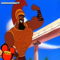

In [30]:
#Getting the image displayed
image_str = infodict[0]['imageUrl']
imgresponse = requests.get(image_str)
image = Image.open(BytesIO(imgresponse.content))
new_image = image.resize((60,60))
display(new_image)

In [ ]:
#resizing the new image 
image_str = infodict[x]['imageUrl']
imgresponse = requests.get(image_str)
image = Image.open(BytesIO(imgresponse.content))
new_image = image.resize((60,60))
new_image
# character_data {'pic':[infodict[x]['name'] for x in range(len(infodict))]}

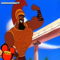

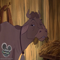

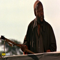

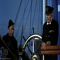

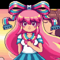

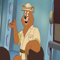

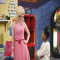

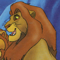

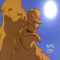

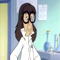

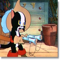

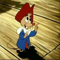

KeyError: 'imageUrl'

In [86]:
#adding the image

def populate():
    for x in range(len(infodict)):
        image_str = infodict[x]['imageUrl']
        imgresponse = requests.get(image_str)
        image = Image.open(BytesIO(imgresponse.content))
        new_image = image.resize((60,60))
        show = display(new_image)
        df.loc[x].append(show)
populate()
                  

In [ ]:
#convert images into numpy arrays
'''def populate():
        for x in range(len(infodict)):
            image_str = infodict[x]['imageUrl']
            imgresponse = requests.get(image_str)
            image = Image.open(BytesIO(imgresponse.content))
            new_image = image.resize((60,60))
            numpydata = asarray(new_image)
            print(numpydata)
populate() '''

In [9]:
#Creating a function to search for specific character info
def findcharacter():
        checker = filtered_character_list['name']
        search = input('Enter the character you want to retrieve info for').title()
        if search in checker:
            idnum = df[df['name'] == search].index
            return df.loc[idnum]
        else:
            return 'Character not found'
findcharacter()

,name,films,short_films,tv_shows,allies,enemies,park_attractions
0,Achilles,[Hercules (film)],[],[Hercules (TV series)],[],[],[]


In [ ]:
df2 = pd.read_csv('Disney_api_data.csv')
print(df2.head())